<a href="https://colab.research.google.com/github/GIGAParviz/pneumonia-chest-prediction-with-CNN/blob/main/pneumonia_chest_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Downloding dataset**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amparviz","key":"94bf65b3008dbf454a4c8a8eb83ff500"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d lasaljaywardena/pneumonia-chest-x-ray-dataset

 99% 1.13G/1.14G [00:11<00:00, 88.5MB/s]
100% 1.14G/1.14G [00:11<00:00, 106MB/s] 


In [7]:
! unzip pneumonia-chest-x-ray-dataset.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/normal/IM-0435-0001-0001.jpeg  
  inflating: train/train/normal/IM-0435-0001.jpeg  
  inflating: train/train/normal/IM-0437-0001-0001.jpeg  
  inflating: train/train/normal/IM-0437-0001-0002.jpeg  
  inflating: train/train/normal/IM-0437-0001.jpeg  
  inflating: train/train/normal/IM-0438-0001.jpeg  
  inflating: train/train/normal/IM-0439-0001-0001.jpeg  
  inflating: train/train/normal/IM-0439-0001-0002.jpeg  
  inflating: train/train/normal/IM-0439-0001.jpeg  
  inflating: train/train/normal/IM-0440-0001.jpeg  
  inflating: train/train/normal/IM-0441-0001.jpeg  
  inflating: train/train/normal/IM-0442-0001.jpeg  
  inflating: train/train/normal/IM-0444-0001.jpeg  
  inflating: train/train/normal/IM-0445-0001.jpeg  
  inflating: train/train/normal/IM-0446-0001.jpeg  
  inflating: train/train/normal/IM-0447-0001.jpeg  
  inflating: train/train/normal/IM-0448-0001.jpeg  
  inflating: train/train/normal/IM-0449-

# **Import Important Libraries**

In [26]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D , Flatten , MaxPooling2D , Dense , Dropout , Input , Concatenate , AveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt

# **Importing trainign data and data preprocessing**








In [10]:
data = keras.utils.image_dataset_from_directory('train/train' , batch_size=52 , image_size=(256,256))

Found 5216 files belonging to 2 classes.


In [11]:
data = data.map(lambda x,y : (x/255 , y))
batch = data.as_numpy_iterator().next()

In [12]:
batch[0].min()

0.0

In [13]:
batch[0].max()

1.0

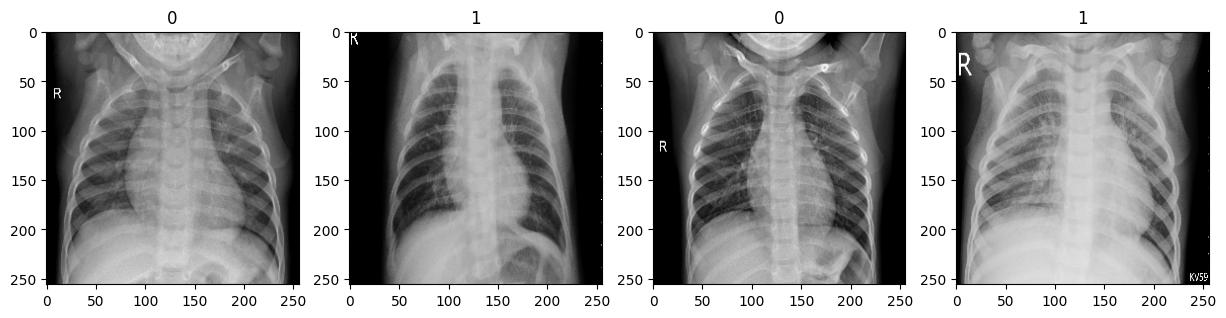

In [14]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch[0][:4]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch[1][inx])
plt.show()

In [15]:
test = keras.utils.image_dataset_from_directory('train/test' , image_size=(256,256) , batch_size=52)

Found 624 files belonging to 2 classes.


In [16]:
test = test.map(lambda x,y:(x/255 , y))

In [17]:
batch2 = test.as_numpy_iterator().next()

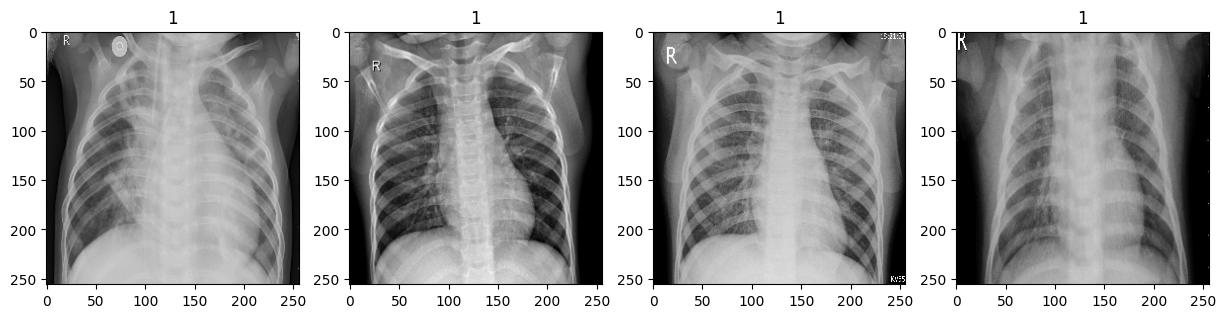

In [18]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch2[0][4:8]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch2[1][inx])
plt.show()

In [19]:
val= keras.utils.image_dataset_from_directory('train/val' , batch_size=52 , image_size=(256 , 256))

Found 16 files belonging to 2 classes.


In [20]:
val = val.map(lambda x,y:(x/255 , y))

In [21]:
batch3 = val.as_numpy_iterator().next()

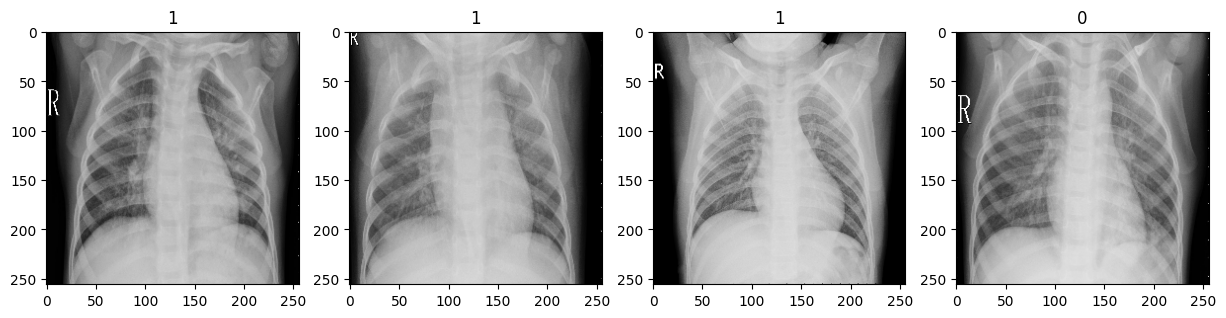

In [22]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch3[0][4:8]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch3[1][inx])
plt.show()

In [29]:
from keras import layers

# **Creating convoluntional Neural Network API**

In [46]:
input = Input(shape=(256,256,3))
layer1 = Conv2D(256 , (4,4) , strides=(2,2) , activation='relu')(input)
layer2 = MaxPooling2D(2)(layer1)
layer3 = Conv2D(256 , (4,4) , strides=(2,2) , padding='same' , activation='relu')(layer2)
layer4 = MaxPooling2D(2)(layer3)
layer5 = Conv2D(150 , (4,4) , strides=(2,2) , padding='same' , activation='relu')(layer4)
layer6 = Conv2D(100 , (4,4) , strides=(2,2) , padding='same' , activation='relu')(layer5)
layer7 = AveragePooling2D(2)(layer6)
flat = Flatten()(layer7)
layer8 = Dense(250 , activation='relu')(flat)
layer9 = Dense(150 , activation='relu')(layer8)
layer10 = Dense(100 , activation='relu')(layer9)
concate = Concatenate()([layer10 , layer8])
output = Dense(1 , activation='sigmoid')(concate)

model = Model(inputs=(input) , outputs=(output))

In [47]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_19')>

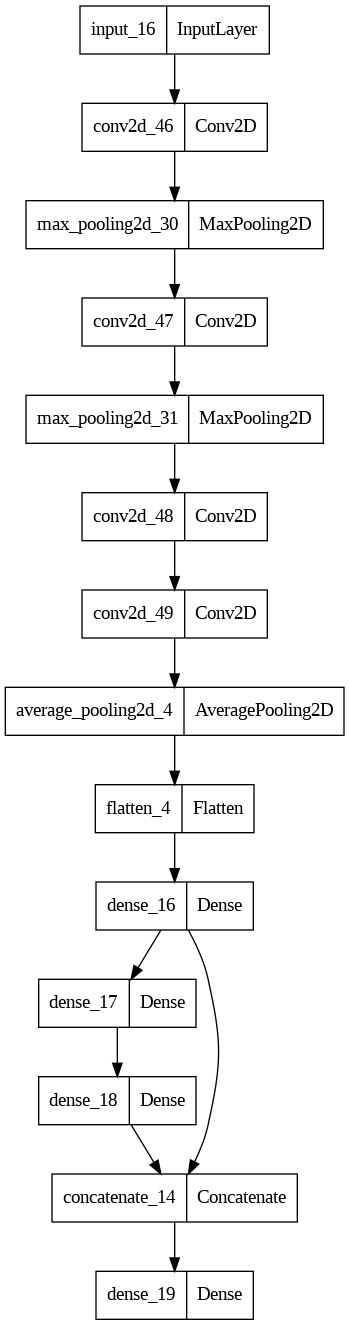

In [48]:
keras.utils.plot_model(model)

In [51]:
model.compile(loss=tf.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy']
              )
calb = keras.callbacks.ModelCheckpoint('Pnemonia chest x ray.h5' , save_best_only=True)

# **Training the model**

In [52]:
history = model.fit( data , validation_data=(val) , epochs=10  , callbacks=[calb])

Epoch 1/10
101/101 [==============================] - 51s 444ms/step - loss: 0.1170 - accuracy: 0.9588 - val_loss: 0.5204 - val_accuracy: 0.8750


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
101/101 [==============================] - 41s 385ms/step - loss: 0.0850 - accuracy: 0.9693 - val_loss: 0.7823 - val_accuracy: 0.8125
Epoch 3/10
101/101 [==============================] - 41s 384ms/step - loss: 0.0683 - accuracy: 0.9751 - val_loss: 0.1303 - val_accuracy: 0.8750
Epoch 4/10
101/101 [==============================] - 42s 387ms/step - loss: 0.0646 - accuracy: 0.9772 - val_loss: 0.6394 - val_accuracy: 0.8750
Epoch 5/10
101/101 [==============================] - 42s 390ms/step - loss: 0.0503 - accuracy: 0.9831 - val_loss: 0.2149 - val_accuracy: 0.8750
Epoch 6/10
101/101 [==============================] - 42s 383ms/step - loss: 0.0359 - accuracy: 0.9872 - val_loss: 0.5145 - val_accuracy: 0.8750
Epoch 7/10
101/101 [==============================] - 41s 384ms/step - loss: 0.0386 - accuracy: 0.9856 - val_loss: 0.3330 - val_accuracy: 0.8750
Epoch 8/10
101/101 [==============================] - 41s 379ms/step - loss: 0.0401 - accuracy: 0.9841 - val_loss: 0.0575 - val_ac

# **Evaluating our Model**

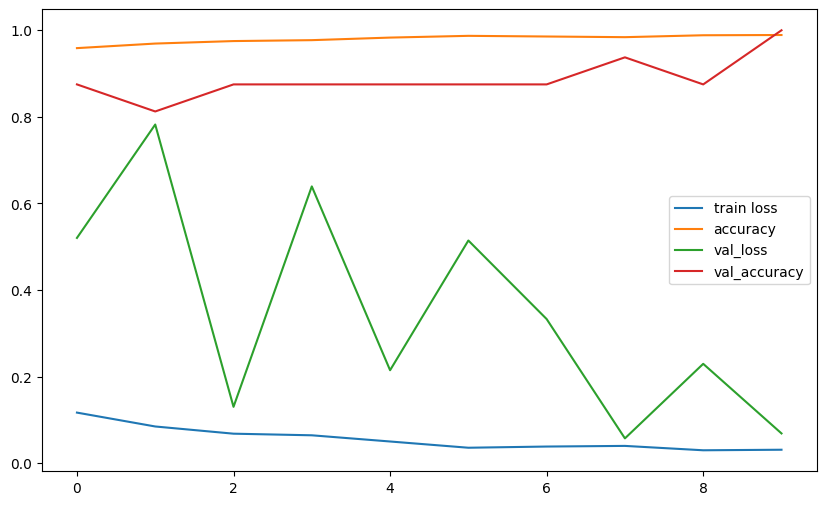

In [53]:
fig , ax = plt.subplots(figsize=(10 ,6))
ax.plot(history.history['loss'] , label= "train loss")
ax.plot(history.history['accuracy'] , label= "accuracy")
ax.plot(history.history['val_loss'] , label= "val_loss")
ax.plot(history.history['val_accuracy'] , label= "val_accuracy")
ax.legend()

In [ ]:
batch = test.as_numpy_iterator().next()
batch[0]

In [57]:
model.evaluate(test)

12/12 [==============================] - 5s 144ms/step - loss: 1.0981 - accuracy: 0.7660


[1.0981272459030151, 0.7660256624221802]

In [150]:
import matplotlib.pyplot as plt

# **Real Diagnosis**

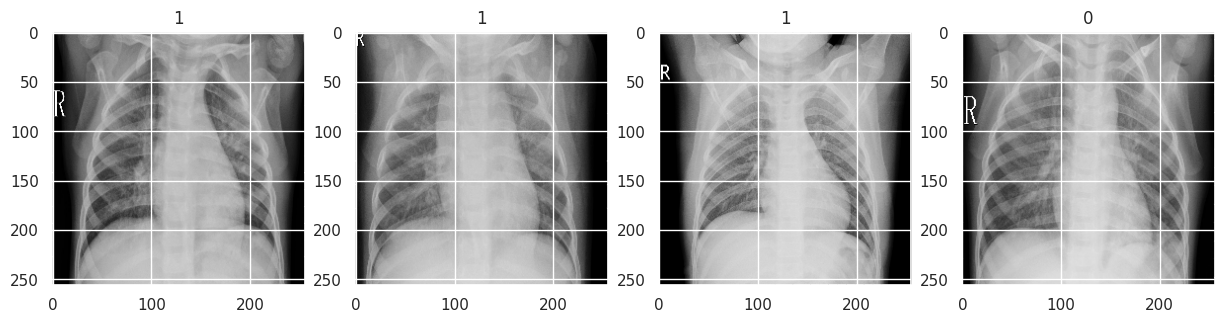

In [151]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch3[0][4:8]):
  ax[inx].imshow(img)
  ax[inx].title.set_text(batch3[1][inx])
plt.show()

# **Model Diagnosis**

1/1 [==============================] - 0s 25ms/step


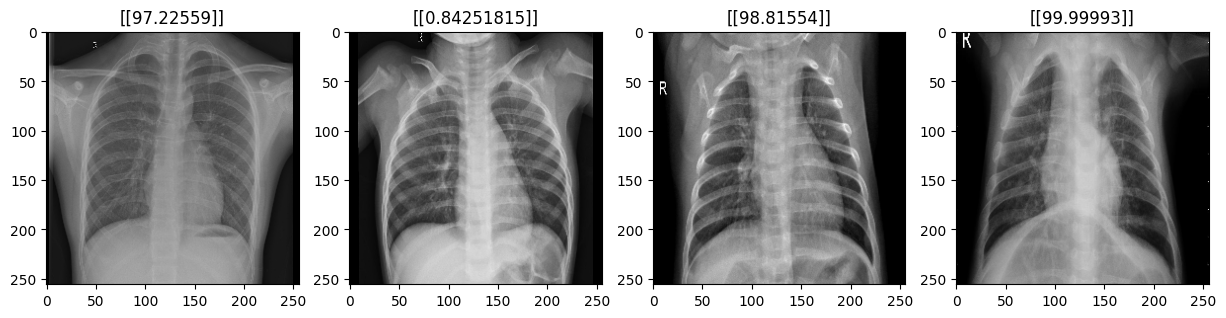

In [94]:
fig , ax = plt.subplots(ncols=4 ,figsize=(15,15))

for inx , img in enumerate(batch[0][4:8]):
  ax[inx].imshow(img)
  img = np.expand_dims(img , axis=0)
  pre = model.predict(img)
  ax[inx].title.set_text(pre*100)
plt.show()

hope you like it  ;)